# Stock Market Prediction

# Data Preprocessing

In [44]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [14]:
df_stock = pd.read_csv('infolimpioavanzadoTarget.csv')
df_stock.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [15]:
df_stock.shape

(7781, 1285)

In [16]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [17]:
df_stock.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [21]:
#Checking for null values
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [28]:
#Handling Null Values and replacing them with their mean
df_stock['stochastic-kd-15'].fillna((df_stock['stochastic-kd-15'].mean()), inplace=True)
df_stock['volumenrelativo'].fillna((df_stock['volumenrelativo'].mean()), inplace=True)
df_stock['diff'].fillna((df_stock['diff'].mean()), inplace=True)
df_stock['INCREMENTO'].fillna((df_stock['INCREMENTO'].mean()), inplace=True)

In [29]:
df_stock.isnull().sum()

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64

# Exploratory Data Analysis

Selecting only relevant data that is required for EDA and Stock market prediction

In [52]:
df_new = df_stock[['ticker','date','open', 'high', 'low', 'close','adjclose', 'volume', 'TARGET']]
df_new

,ticker,date,open,high,low,close,adjclose,volume,TARGET
0,ASLE,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,0
1,ASLE,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,0
2,ASLE,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,0
3,ASLE,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,0
4,ASLE,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,0
...,...,...,...,...,...,...,...,...,...
7776,ATLO,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,0
7777,ATLO,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,0
7778,ATLO,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,0
7779,ATLO,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,0


In [31]:
df_new = df_new.reset_index()
print(df_new.head())

   index ticker        date       open       high        low      close  \
0      0   ASLE  2022-01-03  17.799999  18.219000  17.500000  17.760000   
1      1   ASLE  2022-01-04  17.700001  18.309999  17.620001  17.660000   
2      2   ASLE  2022-01-05  17.580000  17.799999  16.910000  16.950001   
3      3   ASLE  2022-01-06  16.650000  16.879999  16.139999  16.170000   
4      4   ASLE  2022-01-07  16.219999  16.290001  15.630000  15.710000   

    adjclose  volume  
0  17.760000  106600  
1  17.660000  128700  
2  16.950001  103100  
3  16.170000  173600  
4  15.710000  137800  


In [34]:
import plotly.express as px
fig = px.line(df_new, x='date',
              y='close',
              color='ticker',
              title='Stock Market Performance over the months')
fig.show()

In [38]:
fig = px.line(df_new, x='date',
              y='volume',
              color='ticker',
              title='Volume of Stock Traded')
fig.show()

In [42]:
df_new['Volatitly'] = df_new.groupby('ticker')['close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.area(df_new, x='date', y='Volatitly',
              color= 'ticker',
              title='Volatility of All Companies')
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4480\146144063.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



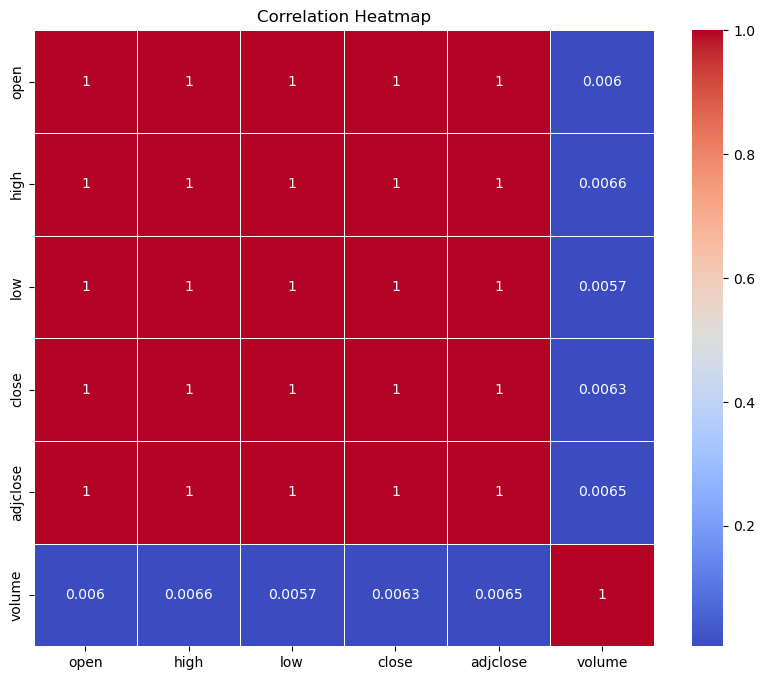

In [45]:
correlation_matrix = data_new.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4480\3575239668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ticker,date,open,high,low,close,adjclose,volume,tomorrow
0,ASLE,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,17.660000
1,ASLE,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,16.950001
2,ASLE,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,16.170000
3,ASLE,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,15.710000
4,ASLE,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,15.860000
...,...,...,...,...,...,...,...,...,...
7776,ATLO,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,23.350000
7777,ATLO,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,23.350000
7778,ATLO,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,23.610001
7779,ATLO,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,23.610001


In [60]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4480\1825596126.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ticker,date,open,high,low,close,adjclose,volume,tomorrow,target
0,ASLE,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,17.660000,False
1,ASLE,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,16.950001,False
2,ASLE,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,16.170000,False
3,ASLE,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,15.710000,False
4,ASLE,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,15.860000,True
...,...,...,...,...,...,...,...,...,...,...
7776,ATLO,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,23.350000,True
7777,ATLO,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,23.350000,False
7778,ATLO,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,23.610001,True
7779,ATLO,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,23.610001,False


# Prediction Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [63]:
#Train set will have all the rows except the last 100 Test set will have only the last 100 rows
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]

In [65]:
predictors = ["open", "high", "low", "close"] #Exempt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [66]:
from sklearn.metrics import precision_score

In [67]:
pred = model.predict(test[predictors])

In [68]:
pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])

In [71]:
# Visualizing the forecasted future stock values
fig = px.line(test, x=test.index, y=['target'], title='Stock Price Prediction')
fig.add_scatter(x=test.index, y=pred, mode='lines', name='Predicted Price')
fig.show()